# Prikazi časovnih količin

## Časovne količine

Vrednost časovne količine $\mathbf{a}$ se spreminja skozi čas $T$
$$  \mathbf{a}(t) = \left\{\begin{array}{ll} 
                a(t) & t \in T_a \\
                ⌘ & t \in T \setminus T_a
             \end{array}\right. $$
kjer je $T_a$ čas dejavnosti časovne količine $\mathbf{a}$, $a(t)$ je njena vrednost v trenutku $t \in T_a$ in ⌘ označuje vrednost nedoločeno.

Predpostavljamo, da vrednosti časovnih količin pripadajo množici 𝕊, ki je polkolobar
$(𝕊,\oplus,\odot,𝟘,𝟙)$ za dvočleni operaciji $\oplus : 𝕊\times 𝕊 \to 𝕊$ in
$\odot : 𝕊\times 𝕊 \to 𝕊$. 

Obe operaciji polkolobarja lahko razširimo na množico
$𝕊_{\scriptsize ⌘} = 𝕊 \cup \{⌘\}$ z zahtevo, da za vsak $\mathbf{a} \in 𝕊_{\scriptsize ⌘}$ velja
$$ \mathbf{a} ⊕ ⌘ = ⌘ ⊕ \mathbf{a} = \mathbf{a} \quad \mbox{in} \quad
   \mathbf{a} ⊙ ⌘ = ⌘ ⊙ \mathbf{a} = ⌘ . $$
Struktura $(𝕊_{\scriptsize ⌘},⊕,⊙,⌘,𝟙)$ je spet polkolobar.

Označimo s $𝕊_{\scriptsize ⌘}(T)$ množico vseh časovnih količin nad množico  $𝕊_{\scriptsize ⌘}$ v času $T$. Za razširitev operacij na omrežja in matrike omrežij vpeljemo vsoto $ \mathbf{a} ⊞ \mathbf{b} $ (vzporedne povezave) 
$$ (a⊞b)(t) =  a(t) ⊕ b(t) \quad \mbox{ in } \quad T_{a + b} = T_a \cup T_b .$$
in produkt $ \mathbf{a} ⊡ \mathbf{b} $ (zaporedne povezave)               
$$ (a ⊡ b)(t) =  a(t) ⊙ b(t) \quad \mbox{ in } \quad T_{a \cdot b} = T_a \cap T_b . $$

Vpeljimo še časovni količini $\mathbf{0}$ in $\mathbf{1}$ z zahtevama
 $\mathbf{0}(t) = ⌘$ in $\mathbf{1}(t) = 1$ za vse $t \in T$. Struktura 
$(𝕊_{\scriptsize ⌘}(T),⊞,⊡,\mathbf{0},\mathbf{1})$ je polkolobar.

Pri pripravi programske podpore za delo s časovnimi količinami se moramo omejiti na časovne količine, s katerimi znamo na računalniku računati. Mi se bomo omejili na primer, ko lahko časovno količino $\textbf{a}$ opišemo z urejenim zaporedjem ($s_i < f_i$ in $f_i \leq s_{i+1}$)
$$ \textbf{a} = [ (s_1,f_1,v_1), (s_2,f_2,v_2), \ldots, (s_k,f_k,v_k) ] $$
kjer trojica $(s_i,f_i,v_i)$ pove, da ima časovna količina $\textbf{a}$ na intervalu $[s_i,f_i)$ vrednost $v_i$. Zunaj intervalov ima vrednost nedoločeno ⌘. Velja tudi
$$ T_a = \bigcup_{i \in 1..k} [s_i, f_i)  .$$

In [1]:
tmin = 1
tmax = 22
a = [(1,5,2),(6,8,1),(11,12,3),(14,16,2),(17,18,5),(19,20,1)]
b = [(2,3,4),(4,7,3),(9,10,2),(13,15,5),(16,21,1)]
println("a = $a")
println("b = $b")

a = [(1, 5, 2), (6, 8, 1), (11, 12, 3), (14, 16, 2), (17, 18, 5), (19, 20, 1)]
b = [(2, 3, 4), (4, 7, 3), (9, 10, 2), (13, 15, 5), (16, 21, 1)]


Če privzamemo diskretni čas (naravna števila) in nenegativne vrednosti, lahko za prikaze časovnih količin uporabimo stolpčne prikaze (bar chart).

## Prikaz (diskretne) časovne količine

Trenutno veljata za najboljši knjižnici za prikaze v Juliji knjižnici Plots (StatPlots) in Gadfly.


https://hyphaebeast.club/writing/julia-data-visualization/

http://docs.juliaplots.org/latest/

https://juliapackages.com/p/statsplots

http://gadflyjl.org/stable/

Knjižnice enkrat namestimo

In [ ]:
using Pkg
Pkg.add("Plots")
Pkg.add("StatsPlots")
Pkg.add("Gadfly")

in jih nato po potrebi uporabljamo. Ker je StatPlots nadgradnja Plots, bom sam uporabljal StatPlots.

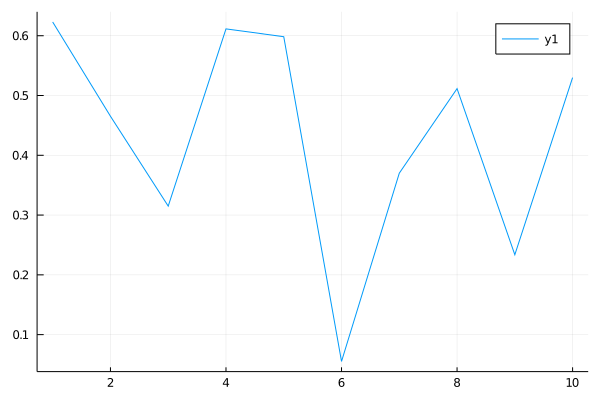

In [5]:
using StatsPlots
x = 1:10       # x-axis
y = rand(10)   # y-axis
plot(x, y)

Za stolpčni prikaz časovne količine moramo najprej določiti višine stolpcev. V časovnih točkah z vrednostjo nedoločeno postavimo višino na 0.

c = [(2011, 2013, 2), (2015, 2016, 3), (2016, 2019, 1)]
x = [2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]
y = [0.0, 2.0, 2.0, 0.0, 0.0, 3.0, 1.0, 1.0, 1.0, 0.0, 0.0]


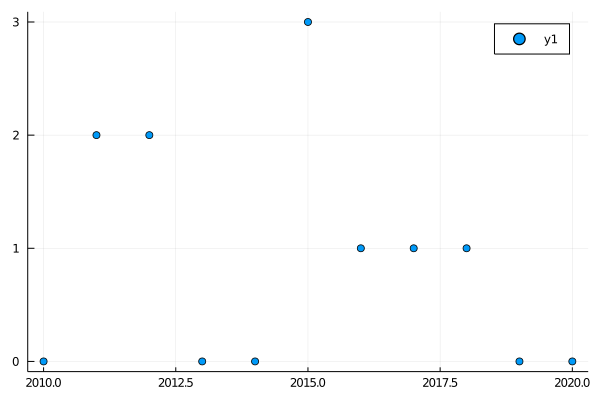

In [4]:
tmin = 2010
tmax = 2020
c = [(2011,2013,2), (2015,2016,3), (2016,2019,1)]
x = collect(tmin:tmax)
y = zeros(tmax-tmin+1)
for i in c
    s, f, v = i
    for t in s-tmin+1:f-tmin
        y[t] = v
    end
end
println("c = $c")
println("x = $x")
println("y = $y")
scatter(x,y)

Pri sestavljanju funkcije za prikaz časovne količine showTQ nastopa vrsta parametrov, ki določajo končni izgled. Ugodno je, če ima večina parametrov privzete vrednosti in mora uporabnik izraziti le posebne želje. O parametrih funkcij v Juliji izvemo na  
https://docs.julialang.org/en/v1/manual/functions/


c = [(2011, 2013, 2), (2015, 2016, 3), (2016, 2019, 1)]


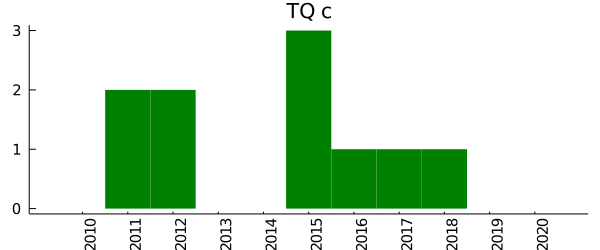

In [6]:
using Plots.PlotMeasures

function valTQ(a)
    y = zeros(tmax-tmin+1)
    for i in a
        s, f, v = i
        for t in s-tmin+1:f-tmin
            y[t] = v
        end
    end
    return y
end

function showTQ(a; fc=:blue, xr=0, wh=[600, 250], fs=8, ti="TQ", bm=10px)
    ticklabel = string.(collect(tmin:tmax))
    y = valTQ(a)
    bar(y,
#        xlabel = "time", 
#        ylabel = "value",
        title = ti,
        fillcolor = fc,
        grid = false,
        lw = 0,
        bar_position = :stack,
        bar_width=1,
        legend = false,
        xrotation = xr,
        tickfontsize = fs,
        size = wh,
        bottom_margin=bm,
        xticks=(1:tmax-tmin+1, ticklabel)
    )    
end

tmin = 2010
tmax = 2020
println("c = $c")
showTQ(c;xr=90,fc=:green,fs=10,bm=15px,ti="TQ c")

Imena barv najdemo na
http://juliagraphics.github.io/Colors.jl/stable/namedcolors/

Na primer: :red, :blue, :orange, :cyan,
:purple4, :royalblue1, :tomato1, :steelblue, :khaki2, :sienna, :olivedrab3

Več o barvah
http://docs.juliaplots.org/latest/generated/colorschemes/

a = [(1, 5, 2), (6, 8, 1), (11, 12, 3), (14, 16, 2), (17, 18, 5), (19, 20, 1)]


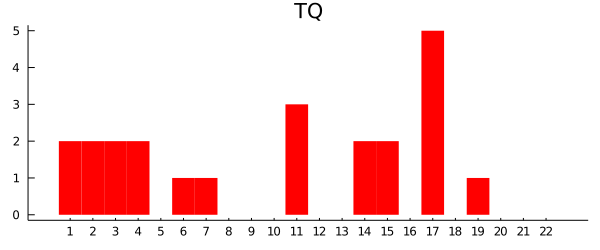

In [7]:
tmin = 1
tmax = 22
println("a = $a")
showTQ(a,fc=:red)

b = [(2, 3, 4), (4, 7, 3), (9, 10, 2), (13, 15, 5), (16, 21, 1)]


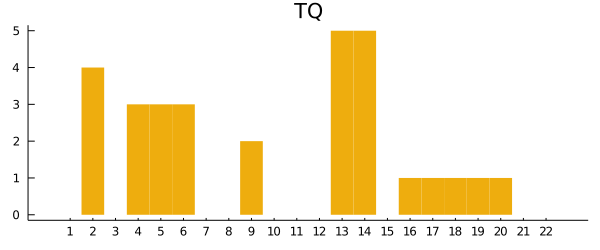

In [8]:
println("b = $b")
showTQ(b;fc=:darkgoldenrod2)

Slike lahko shranimo na datoteko s funkcijo savefig. Oblika zapisa se določi iz podaljška imena datoteke.

In [24]:
savefig("c.pdf")

In [25]:
savefig("c.svg")

In [26]:
savefig("c.png")

## Prikaz dveh časovnih količin skupaj

Včasih bi radi dve časovni količini prikazali na isti sliki
https://github.com/bavla/SocNet/wiki/CombHist

In [9]:
tmin = 1
tmax = 15
p = [ (1,3,1), (5,8,2), (11,12,3) ]
q = [ (2,3,3), (4,7,2), (10,14,1) ]   
y1 = valTQ(p)
y2 = valTQ(q)
m = min.(y1,y2)
z1 = y1-m
z2 = y2-m
println("m  = $m")
println("z1 = $z1")
println("z2 = $z2")


m  = [0.0, 1.0, 0.0, 0.0, 2.0, 2.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0]
z1 = [1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0]
z2 = [0.0, 2.0, 0.0, 2.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 0.0]


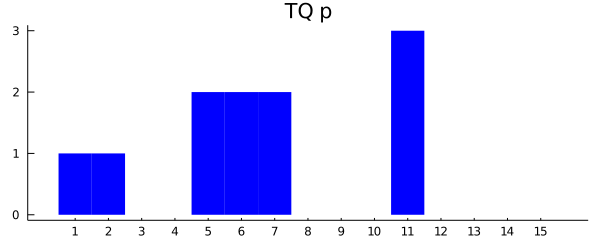

In [10]:
showTQ(p,ti="TQ p")

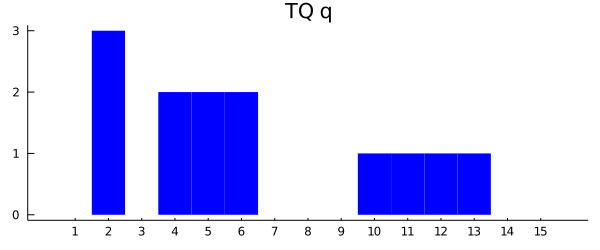

In [11]:
showTQ(q,ti="TQ q")

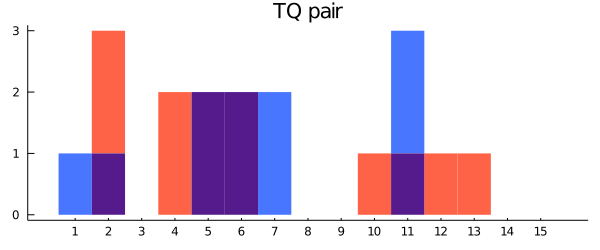

In [12]:
using StatsPlots
function showPairTQ(a, b; xr=0, wh=[600, 250], fs=8, ti="TQ pair", 
    fc = [:royalblue1 :tomato1 :purple4], bm=10px)
    ticklabel = string.(collect(tmin:tmax))
    y1 = valTQ(a)
    y2 = valTQ(b)
    m = min.(y1,y2)
    z1 = y1-m
    z2 = y2-m
    groupedbar([z1 z2 m], 
        title = ti,
        bar_position = :stack, 
        fillcolor = fc, 
        label = ["a" "b" "ab"],
        grid = false,
        lw = 0,
        legend = false,
        xrotation = xr,
        tickfontsize = fs,
        size = wh,
        bottom_margin=bm,
        bar_width=1,
        xticks=(1:tmax-tmin+1, ticklabel)
    )
end
showPairTQ(p,q)

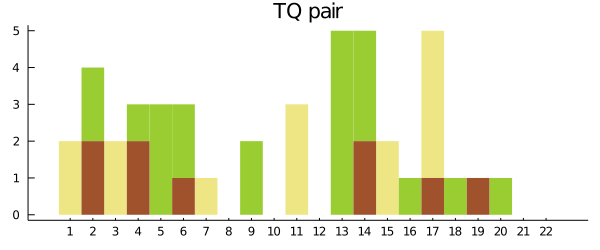

In [13]:
tmin = 1
tmax = 22
showPairTQ(a,b,fc=[:khaki2 :olivedrab3 :sienna])

## Načrti

yMax ?

Podpora prikaza časovnih količin z zveznim časom.


[Kazalo](kazalo.ipynb)